1/1 [==============================] - 2s 2s/step


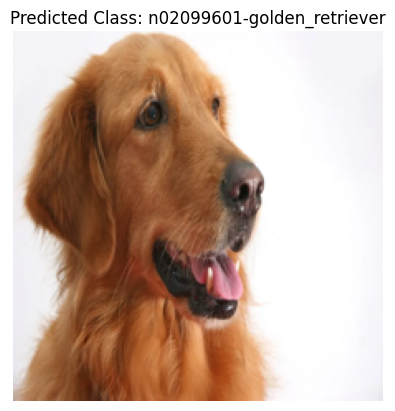

Predicted Class (URL): n02099601-golden_retriever
1/1 [==============================] - 1s 924ms/step


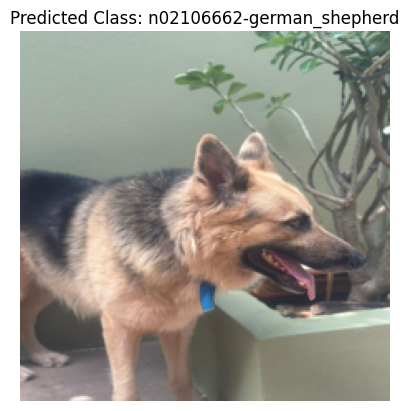

Predicted Class (File): n02106662-german_shepherd


In [ ]:
import os
import requests
import numpy as np
from io import BytesIO
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Setting image dimensions as per model requirements
img_width = 224
img_height = 224

saved_model_dir = 'DenseNet201_FINAL/dog_classifier_model.h5'
labels_file_path = 'DenseNet201_FINAL/labels.txt' 

def get_class_name(class_index, class_labels):
    if 0 <= class_index < len(class_labels):
        return class_labels[class_index]
    else:
        return "Unknown"

def predict_image(image_source, saved_model_dir, class_labels):
    model = tf.keras.models.load_model(saved_model_dir)

    if image_source.startswith('http'):
        # Downloading the image from the web
        response = requests.get(image_source)
        image = Image.open(BytesIO(response.content))
    else:
        # Load image from file path
        image = Image.open(image_source)

    # Resizing and normalizing the image
    image = image.resize((img_width, img_height))
    image = np.array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Adding batch dimension

    # Making predictions
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class_name = get_class_name(predicted_class_index[0], class_labels)

    # Display the image and class name
    plt.figure()
    plt.imshow(image[0])
    plt.title(f'Predicted Class: {predicted_class_name}')
    plt.axis('off')
    plt.show()

    return predicted_class_index[0]

# Testing with a web image URL and a local file path
image_url = 'https://dogtime.com/wp-content/uploads/sites/12/2011/01/GettyImages-140388410-e1692223356634.jpg?w=1024'
local_image_path = r'D:\BreedClassifier\Testing_Images\Beo.jpg'

with open(labels_file_path, 'r') as f:
    class_labels = f.read().splitlines()

Predict from URL
predicted_class_index_url = predict_image(image_url, saved_model_dir, class_labels)
print(f'Predicted Class (URL): {get_class_name(predicted_class_index_url, class_labels)}')

# Predict from local file
predicted_class_index_file = predict_image(image_file_path, saved_model_dir, class_labels)
print(f'Predicted Class (File): {get_class_name(predicted_class_index_file, class_labels)}')

1/1 [==============================] - 1s 966ms/step


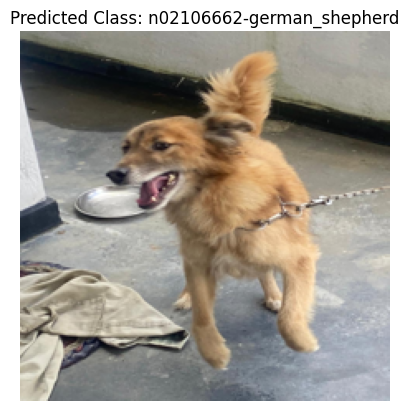

Predicted Class (File): n02106662-german_shepherd


In [ ]:
image_file_path = r'D:\BreedClassifier\Testing_Images\Puppin.jpg'

# Predict from local file
predicted_class_index_file = predict_image(image_file_path, saved_model_dir, class_labels)
print(f'Predicted Class (File): {get_class_name(predicted_class_index_file, class_labels)}')


1/1 [==============================] - 1s 1s/step


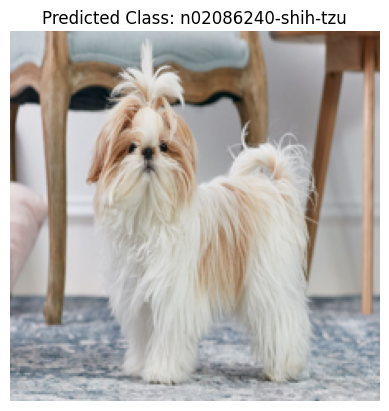

Predicted Class: n02086240-shih-tzu


1/1 [==============================] - 1s 1s/step


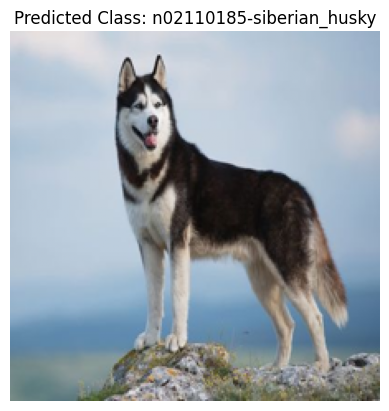

Predicted Class: n02110185-siberian_husky


In [ ]:
def predict_and_display_image(image_url, saved_model_dir, class_labels):
    predicted_class_index = predict_image(image_url, saved_model_dir, class_labels)
    print(f'Predicted Class: {get_class_name(predicted_class_index, class_labels)}')

image_url1 = 'https://www.thesprucepets.com/thmb/Q6vj0wjZpuDir35ywDO3Ke4K3CA=/1500x0/filters:no_upscale():strip_icc()/shih-tzu-dog-breed-profile-1117999-hero-5541b7f6f936478ca766d85ff5af202e.jpeg'
image_url2 = 'https://cdn.britannica.com/84/232784-050-1769B477/Siberian-Husky-dog.jpg?w=400&h=300&c=crop'

predict_and_display_image(image_url1, saved_model_dir, class_labels)
predict_and_display_image(image_url2, saved_model_dir, class_labels)


1/1 [==============================] - 2s 2s/step


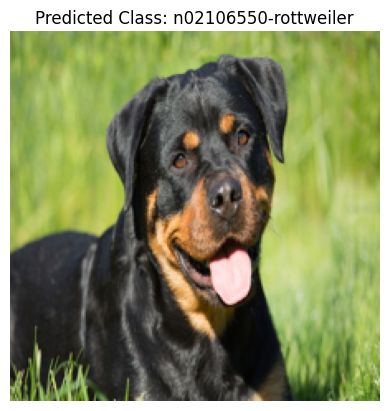

Predicted Class: n02106550-rottweiler


In [ ]:
url ='https://www.dogster.com/wp-content/uploads/2015/05/shutterstock_219143260.jpg'
predict_and_display_image(url, saved_model_dir, class_labels)

1/1 [==============================] - 1s 962ms/step


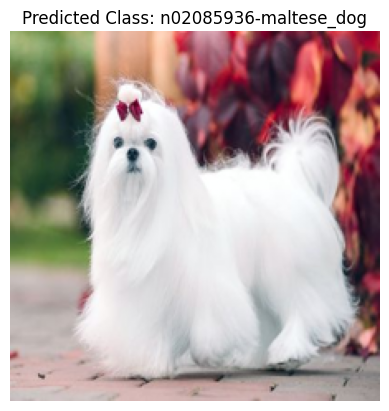

Predicted Class: n02085936-maltese_dog
1/1 [==============================] - 1s 1s/step


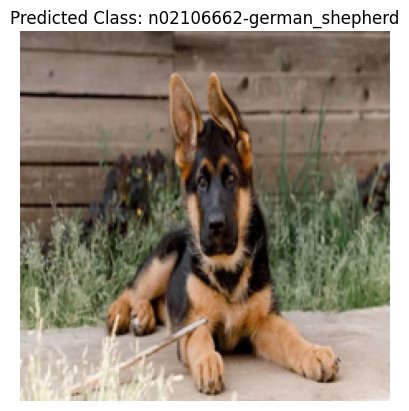

Predicted Class: n02106662-german_shepherd


In [ ]:
image_url1 = 'https://cdn.britannica.com/72/234472-050-735B6214/maltese-dog.jpg?w=400&h=300&c=crop'
image_url2 = 'https://d.newsweek.com/en/full/2201052/dog.webp?w=790&f=00f66f10f38ec8a64a44e953f871c245'

predict_and_display_image(image_url1, saved_model_dir, class_labels)
predict_and_display_image(image_url2, saved_model_dir, class_labels)